<a href="https://colab.research.google.com/github/realvoidgojo/wind-power-gen-forecasting/blob/main/wind_power_gen_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [51]:
# importing libs
import pandas as pd # data_manipulation
import numpy as np # numerical python - linear algebra
import matplotlib.pyplot as plt # visualization lib
import seaborn as sns
from sklearn.model_selection import train_test_split # sklearn - ML
from sklearn.preprocessing import StandardScaler # scaling
from scipy.stats import zscore

In [6]:
location1  = pd.read_csv("Location1.csv")
location2  = pd.read_csv("Location2.csv")
location3  = pd.read_csv("Location2.csv")
location4  = pd.read_csv("Location3.csv")

In [7]:
location1.head()


,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [8]:
# Add a new col to identify the location
location1['Location'] = 'Location1'
location2['Location'] = 'Location2'
location3['Location'] = 'Location3'
location4['Location'] = 'Location4'

In [9]:
# Concatenate the dataframe
merged_data = pd.concat([location1,location2,location3,location4],ignore_index=True)

In [10]:
merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,Location1
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,Location1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,Location1
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,Location1
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,Location1


In [12]:
# Save the merged dataset to a new CSV File
merged_data.to_csv('merged_locations.csv',index=False)

In [13]:
# to see the basic info about the dataset
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [14]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m,175200.0,45.634938,22.624312,-31.2,29.2000,45.9000,64.700,101.7000
relativehumidity_2m,175200.0,69.687409,17.409806,12.0,57.0000,72.0000,84.000,100.0000
dewpoint_2m,175200.0,35.306655,21.085121,-36.2,21.1000,34.9000,53.400,78.7000
windspeed_10m,175200.0,4.327930,2.109569,0.0,2.7300,4.0200,5.590,18.5300
windspeed_100m,175200.0,7.119228,3.179520,0.0,4.8300,6.9000,9.130,24.5900
winddirection_10m,175200.0,203.867420,101.285093,1.0,131.0000,215.0000,293.000,360.0000
winddirection_100m,175200.0,202.837979,102.613732,0.0,129.0000,212.0000,294.000,360.0000
windgusts_10m,175200.0,8.255334,3.677857,0.5,5.5000,7.8000,10.500,29.2000
Power,175200.0,0.303173,0.253148,0.0,0.0901,0.2356,0.475,0.9994


In [15]:
# to check the missing values using isnull() => boolean
merged_data.isnull().sum()

,0
Time,0
temperature_2m,0
relativehumidity_2m,0
dewpoint_2m,0
windspeed_10m,0
windspeed_100m,0
winddirection_10m,0
winddirection_100m,0
windgusts_10m,0
Power,0


In [16]:
# to check the duplicated rows
merged_data.duplicated().sum()

np.int64(0)

In [17]:
# Encode the categorical values
merged_data = pd.get_dummies(merged_data, columns=['Location'] , drop_first=True)

In [18]:
merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,False,False,False
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,False,False,False
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,False,False,False
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,False,False,False
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,False,False,False


In [19]:
merged_data.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power', 'Location_Location2',
       'Location_Location3', 'Location_Location4'],
      dtype='object')

In [20]:
# Let's remove the time column
merged_data.drop('Time',axis=1,inplace=True)

In [21]:
merged_data.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,False,False,False
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,False,False,False
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,False,False,False
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,False,False,False
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,False,False,False


Week 2 : EDA (Exploratory Data Analysis )

In [22]:
# extracting the numerical columns
numnerical_cols = merged_data.select_dtypes(include=np.number).columns
numnerical_cols

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power'],
      dtype='object')

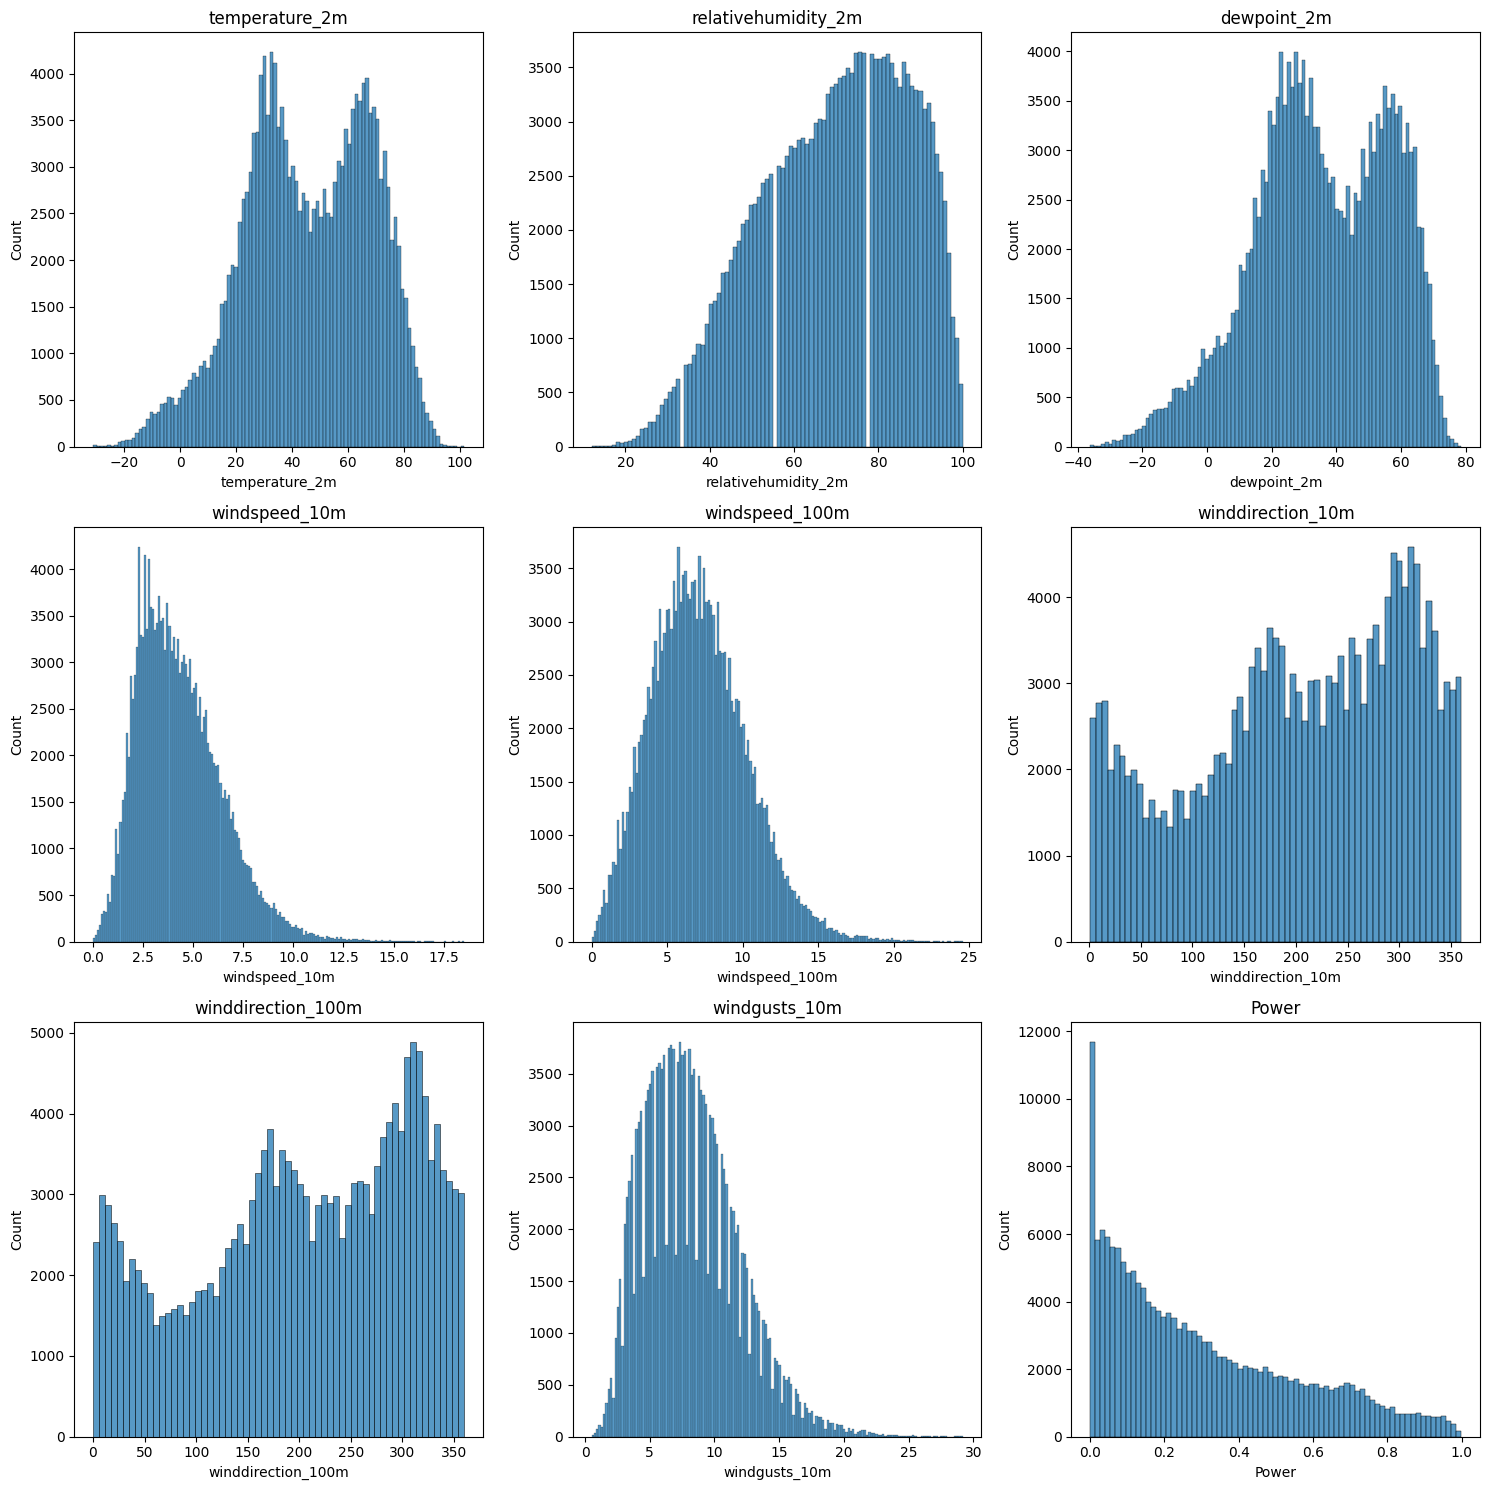

In [26]:
# ploting using subplots for the data distribution of each numerical cols
fig, axes = plt.subplots(3,3,figsize=(15,15))
# Converts the 2D array of axes into a 1D array, so you can iterate easily
axes = axes.flatten()
for i,col in enumerate(numnerical_cols):
  sns.histplot(merged_data[col],ax=axes[i])
  axes[i].set_title(col)
plt.tight_layout()
plt.show()

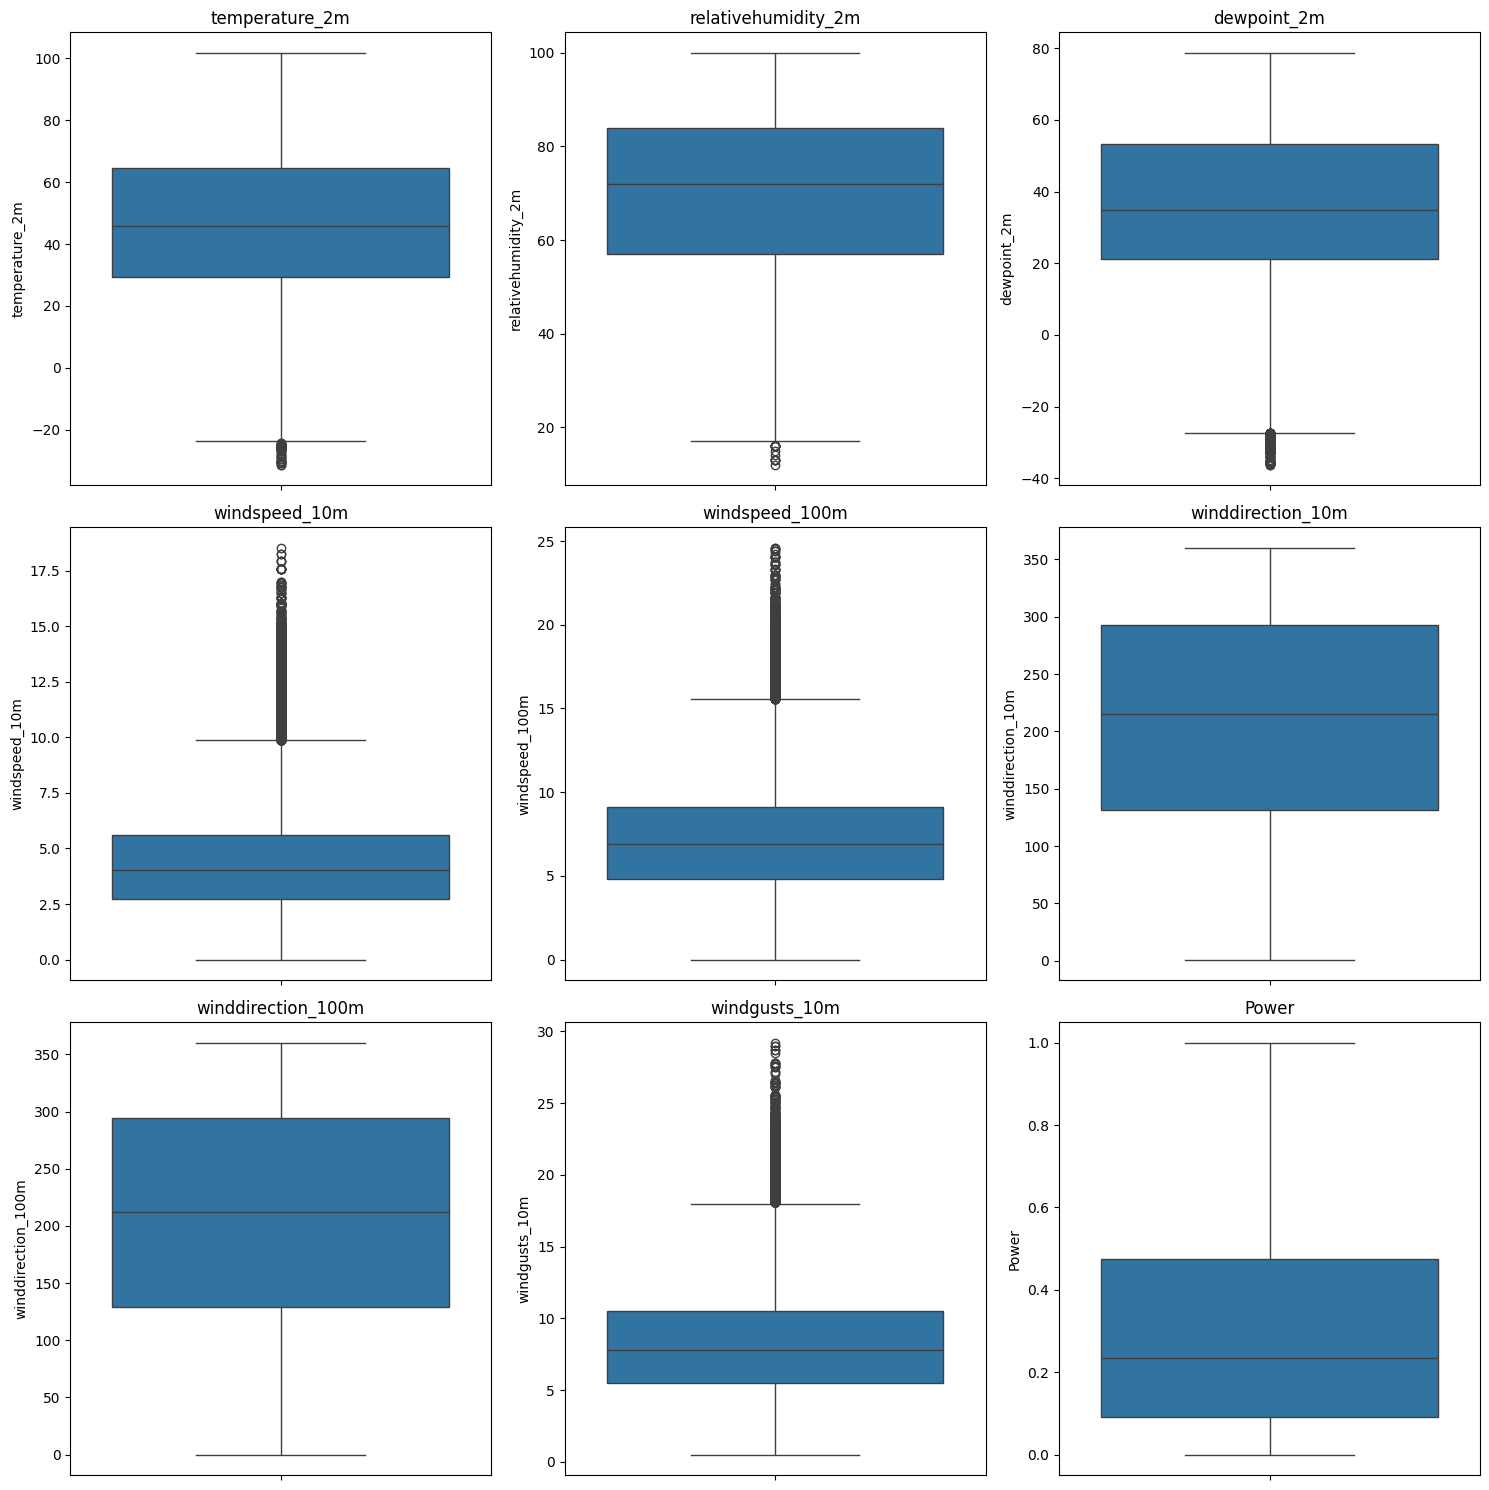

In [28]:
# creating box plot
fig, axes = plt.subplots(3,3,figsize=(15,15))
axes = axes.flatten()
for i,col in enumerate(numnerical_cols):
  sns.boxplot(merged_data[col],ax=axes[i])
  axes[i].set_title(col)
plt.tight_layout()
plt.show()

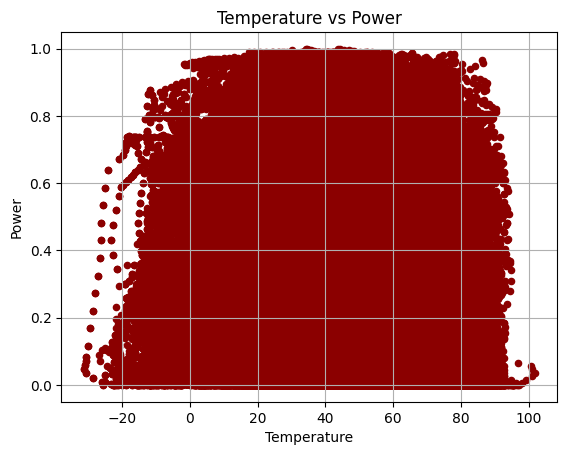

In [46]:
# using scatter to plot the see the btw power & temp
merged_data.plot.scatter(x='temperature_2m',y='Power',c='DarkRed')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Temperature vs Power')
plt.grid(True)
plt.show()

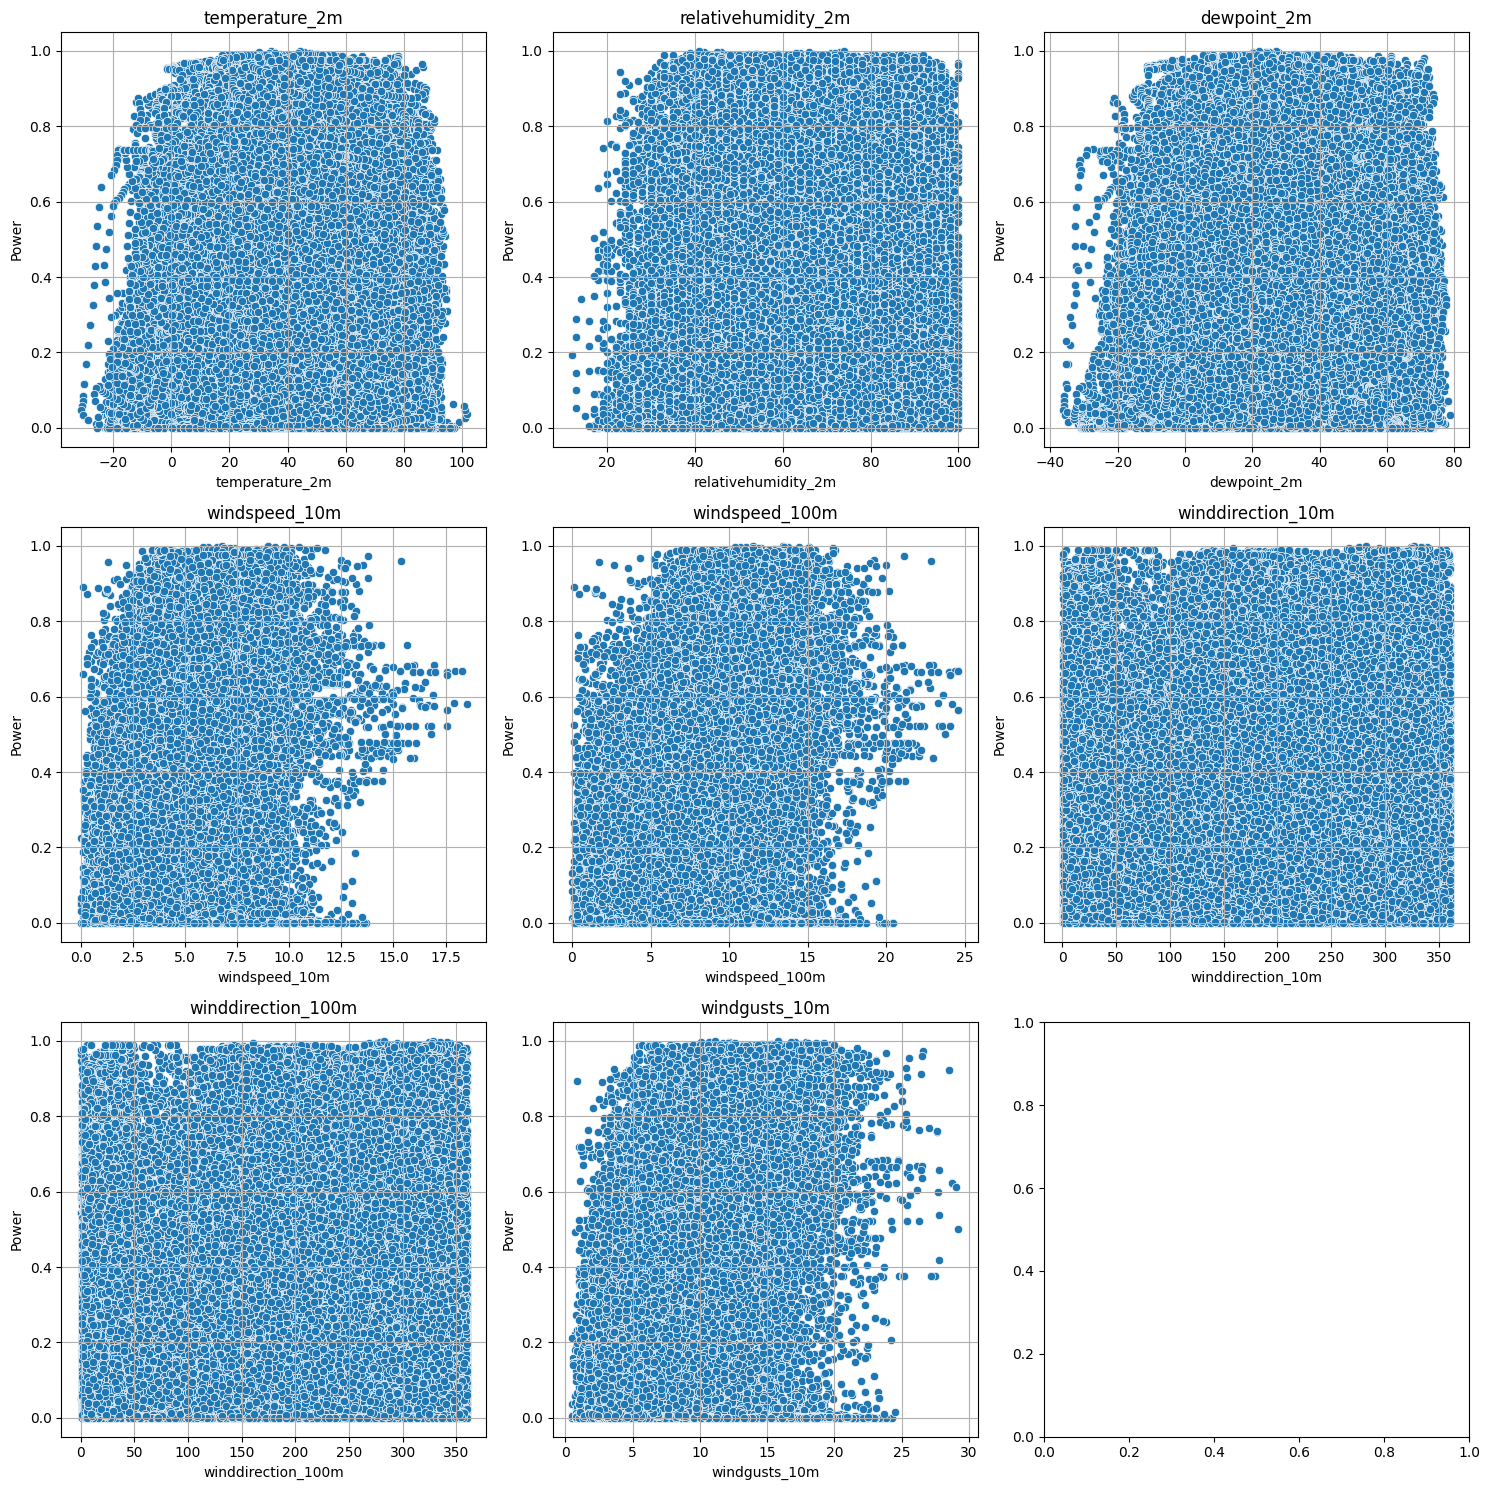

In [47]:
# Creating multiple plots to see the relation btw different cols and power
fig,axes = plt.subplots(3,3,figsize=(15,15))
axes = axes.flatten()
for i,col in enumerate(numnerical_cols.drop('Power')):
  sns.scatterplot(x=col,y='Power',data=merged_data,ax=axes[i])
  axes[i].set_title(col)
  axes[i].grid(True)
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Power')
plt.tight_layout()

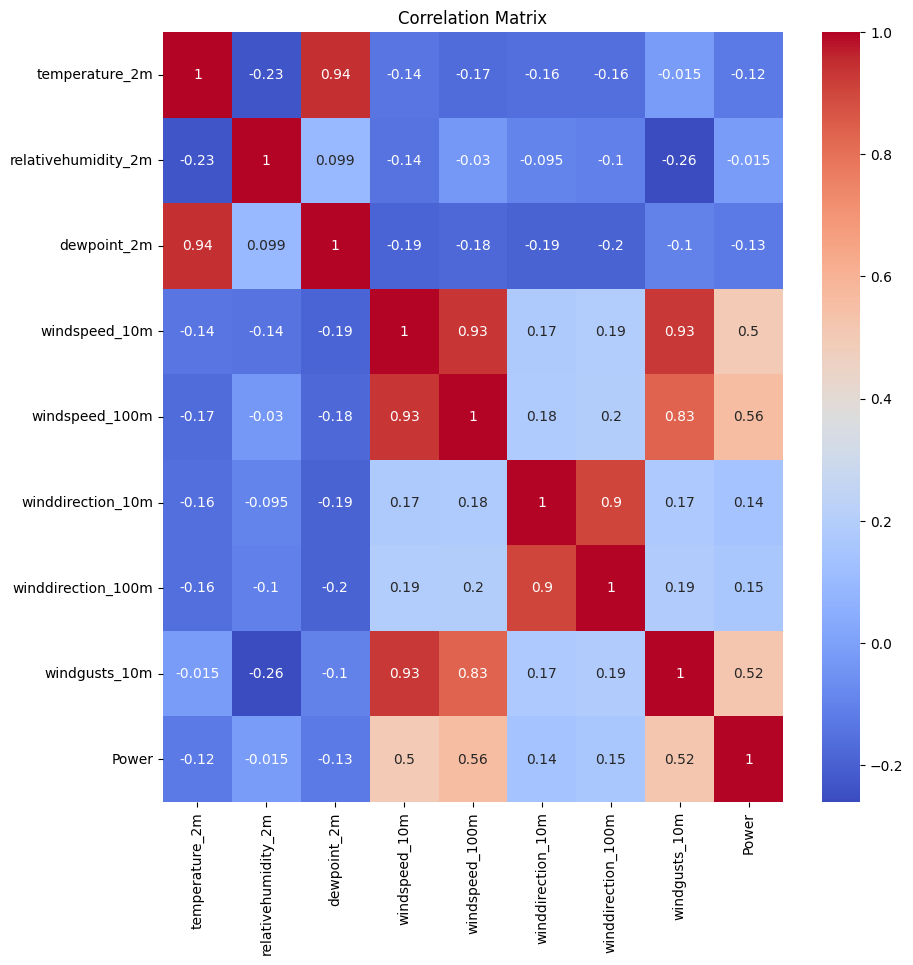

In [50]:
# check the correlation btw the cols and power
correlation = merged_data[numnerical_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [52]:
z_scores = np.abs(zscore(merged_data[numnerical_cols]))
outliers = (z_scores > 3).sum(axis=0)
print("Outlier count per numerical column:\n", outliers)

Outlier count per numerical column:
 temperature_2m           72
relativehumidity_2m      30
dewpoint_2m             197
windspeed_10m          1492
windspeed_100m          999
winddirection_10m         0
winddirection_100m        0
windgusts_10m          1334
Power                     0
dtype: int64


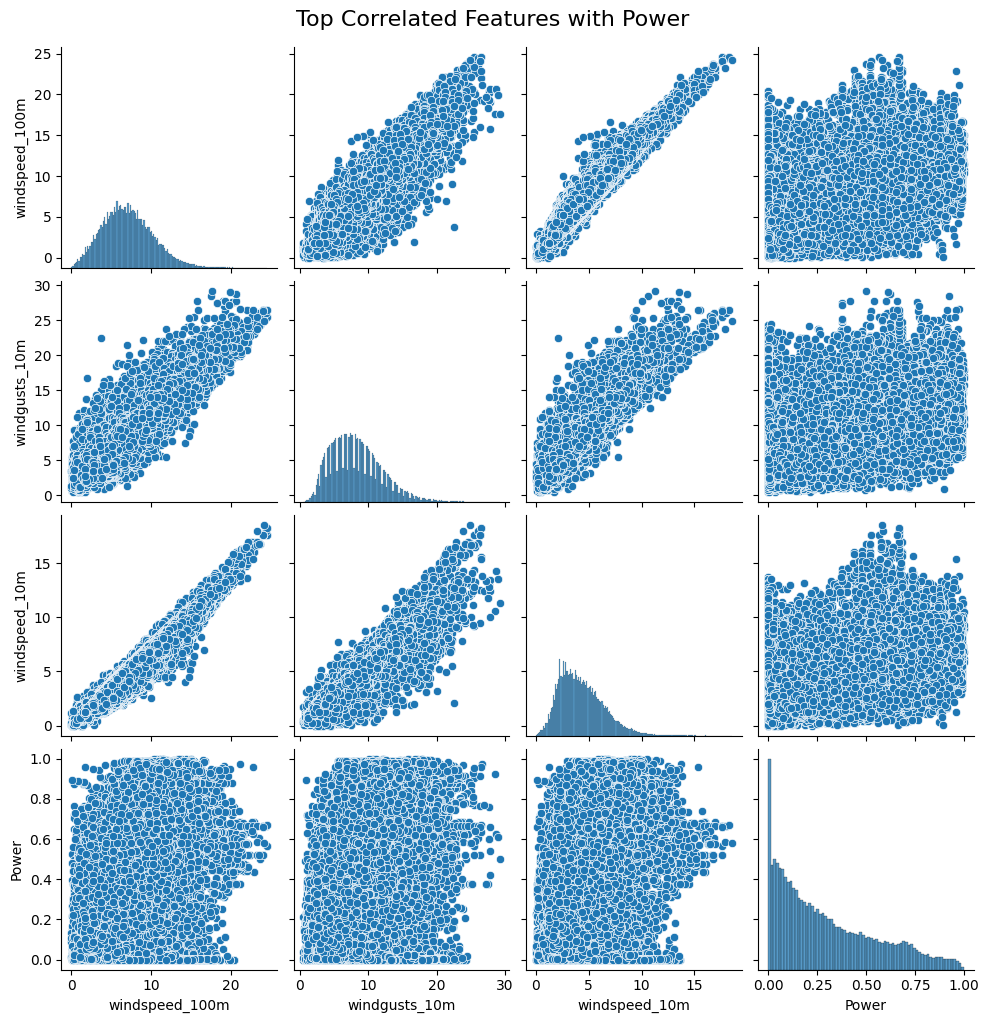

In [55]:
pair_grid = sns.pairplot(merged_data, vars=top_corr + ['Power'], kind='scatter')
pair_grid.fig.suptitle("Top Correlated Features with Power", y=1.02, fontsize=16)
for ax in pair_grid.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)
plt.show()
